# Binary Trees

In [2]:
from graphviz import Digraph
import IPython

class Tree:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def depth_first_preorder(tree):
    if tree is not None:
        print(tree.val)
        depth_first_preorder(tree.left)
        depth_first_preorder(tree.right)
        
def depth_first_inorder(tree):
    if tree is not None:
        depth_first_inorder(tree.left)
        print(tree.val)
        depth_first_inorder(tree.right)

def depth_first_postorder(tree):
    if tree is not None:
        depth_first_postorder(tree.left)
        depth_first_postorder(tree.right)
        print(tree.val)

def _tree_to_dot(tree, g):
    if tree.left is not None:
        g.edge(str(tree.val), str(tree.left.val))
        _tree_to_dot(tree.left, g)
    if tree.right is not None:
        g.edge(str(tree.val), str(tree.right.val))
        _tree_to_dot(tree.right, g)

def tree_to_dot(tree):
    g = Digraph()
    if tree is not None:
        _tree_to_dot(tree, g)
    return g

In [3]:
tree = Tree(1, Tree(2, Tree(3), Tree(4)), Tree(5, Tree(6), Tree(7)))

In [4]:
depth_first_preorder(tree)
print()
depth_first_inorder(tree)
print()
depth_first_postorder(tree)

1
2
3
4
5
6
7

3
2
4
1
6
5
7

3
4
2
6
7
5
1


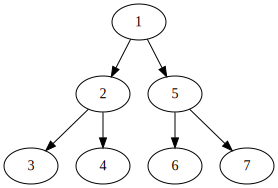

In [5]:
tree_to_dot(tree)

In [6]:
def breadth_first(tree):
    if tree is not None:
        q = [tree]
        while len(q) > 0:
            cur = q.pop(0)
            print(cur.val, end=' ')
            if cur.left is not None:
                q.append(cur.left)
            if cur.right is not None:
                q.append(cur.right)
    print()

def breadth_first_with_level(tree):
    if tree is not None:
        q = [tree, None]
        while len(q) > 0:
            cur = q.pop(0)
            if cur is None:
                print()
                if len(q) > 0:
                    q.append(None)
                continue
            print(cur.val, end=' ')
            if cur.left is not None:
                q.append(cur.left)
            if cur.right is not None:
                q.append(cur.right)

In [7]:
breadth_first(tree)
print()
breadth_first_with_level(tree)

1 2 5 3 4 6 7 

1 
2 5 
3 4 6 7 


## Binary Search Tree

**BST**: Binary trees with order on node's value

For any node `N` we verify that:
* All values in the sub-tree `N.left` are smaller than `N`'s value
* All values in the sub-tree `N.right` are bigger than `N`'s value

In [8]:
def bst_search(n, x):
    if n is None:
        return False
    if x == n.val:
        return True
    if x < n.val:
        return bst_search(n.left, x)
    return bst_search(n.right, x)

def bst_search_iter(n, x):
    while n is not None:
        if x == n.val:
            return True
        if x < n.val:
            n = n.left
        else:
            n = n.right
    return False

def is_bst(tree, lower, upper):
    if tree.val < lower or tree.val > upper:
        return False
    return is_bst(tree.left, lower, tree.val) and is_bst(tree.right, tree.val, upper)

### Complexity ?

#### Ideal Case

In the ideal case $O(log~n)$

What's the ideal case ?

**Why ?**

What's the breadth first order of such a tree ?

Do you see the relation with the binary search on sorted array ?

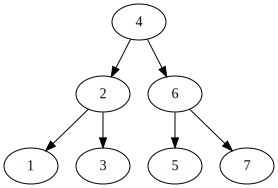

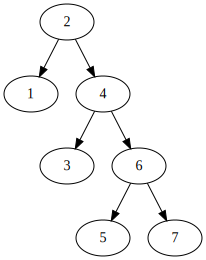

In [9]:
tree1 = Tree(4, Tree(2, Tree(1), Tree(3)), Tree(6, Tree(5), Tree(7)))
IPython.display.display(tree_to_dot(tree1))
tree2 = Tree(2, Tree(1), Tree(4, Tree(3), Tree(6, Tree(5), Tree(7))))
IPython.display.display(tree_to_dot(tree2))

### Well balanced trees

* For any nodes, the amount of nodes of its left subtree is roughly the same as the amount of nodes in its right subtree
* Makes search optimal as we split the search space uniformly

In case of perfect balance, we have the following recursive formula for the worst case:

$$T(n) = T\left(\frac{n}{2}\right) + O(1)$$


If we apply the master theorem here, we end up with complexity $O(log~n)$ as expected.

Usually trees are balanced on their height for practical reasons, there's two main form of such trees:

* AVL: each node stores the heights (or the difference) of its subtrees. The operations keep the difference of heights in the range $[-1,1]$ 
* Red/Black: simulating 2-4 trees with binary tree structure extended with a color flag.

Both techniques use rotations to rebalance trees before it's too late.

In [10]:
def left_rotate(tree):
    new_root = tree.right
    tree.right = new_root.left
    new_root.left = tree
    return new_root

Before left rotation:


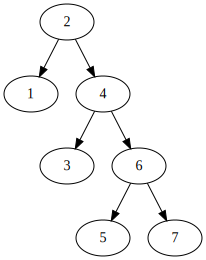

After:


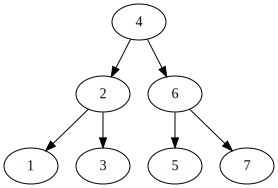

In [11]:
print('Before left rotation:')
T = Tree(2, Tree(1), Tree(4, Tree(3), Tree(6, Tree(5), Tree(7))))
IPython.display.display(tree_to_dot(T))
T = left_rotate(T)
print('After:')
IPython.display.display(tree_to_dot(T))

### AVL

An AVL is a well balanced binary search tree based. Balancing is maintained by keeping extra information in nodes regarding the current _unbalancing_ state. Usually we store the difference of heights between the left and right subtree. The absolute value indicates how much we're unbalanced and the sign which sub-trees is deeper than the other.

AVL operations maintains this difference in the range $[-1...1]$ any time a node leaves this range, we apply a rotation to restore the balance.

We have two simple rotations (left and right) and two double rotations. The double rotations are needed when applying the simple rotation just invert the unbalancing like in the next example.

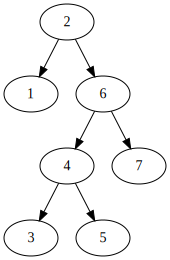

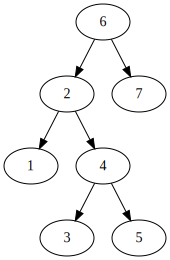

In [12]:
UBTree = Tree(2, Tree(1), Tree(6, Tree(4, Tree(3), Tree(5)), Tree(7)))
IPython.display.display(tree_to_dot(UBTree))
UBTree = left_rotate(UBTree)
IPython.display.display(tree_to_dot(UBTree))

In the previous example, we can see that node `2` has a balance factor (the famous difference) of $-2$ (left sub-tree has a height of $0$ and the right a height of $2$), this is usually solved with left rotation, but if we look at the root of the right sub-tree (the `6`), it's balance factor is $1$. This change of sign indicates the necessity of the double rotation.

The rotations are used during insertion or suppression of a node in the tree. Those operations enforce the AVL properties, so we can assume that if during the process we found an unbalanced node, the rest of the sub-tree is correctly balanced (otherwise it would have triggered rebalancing earlier). The condition to apply rotations is as follow:
* If the node balancing factor is either $-2$ or $2$
* For $-2$:
    * if balance factor of the right child is $0$ or $-1$, apply a **left rotation**
    * if balance factor of the right child is $-1$ apply a **right rotation on the right child, then left rotation on the node**
* The case for $2$ is the exact symetrics in signs and directions

#### Inserting

The insertion operation is recursive algorithm which maintain balance in the back path (from the modified leaf to the root, that is when comming back from recursion). The key idea is to return to the calling parent the change of height (either 0 or 1) so that the parent updates its balance factor and apply rotations accordingly.

It is interesting to do a case study of what happen on the height after insertion in one of the sub-tree (with a change of the height of this sub-tree):

* If we insert the new node in the right sub-tree:
    * If the balance factor of the node is $1$: the challenge _rebalance_ the node and we no longer have a change of height
    * If the factor is $0$: we have a new factor of $-1$ and we gain a level
    * If the factor is $-1$: we have a new factoro of $-2$ and we need a rotation
        * we follow the previous rules to choose the accurate rotation

We can build the insertion in the left sub-tree symetrically.

If we apply the same form of case study to the impact of the rotation, we can note that the change of height due to the insertion is **always** absorbed by the rotation, thus during the insertion of a node, atmost one rotation is needed to maintain the balance of the tree. We can also observe that after a rotation in those cases, the balance factor of the node is $0$, thus we can easily deduce that after insertion and possible rotation, the height has changed only if the updated balance factor is different from $0$.

And the complexity ? Since the original tree is an AVL and is thus balanced, we knoow that the length of the path from the root to the deepest node where the insertion take place is in $O(log~N)$ and thus the time complexity is $O(log~N)$.

```
insert x in AVL tree T:
    Pre-condition: T is a valid AVL
    if T is empty:
        replace T with a new node containing x
        return 1
    else:
        if x == T.key: x is present, nothing else to do return 0
        if x < T.key:
            insert x in T.left
            if recursive call returns 0, then return 0
            else:
                add 1 to balance factor
                if unbalance choose and apply rotation
                return 1 if balance factor is not 0
        else:
            insert x in T.right
            if recursive call returns 0, then return 0
            else:
                add -1 to balance factor
                if unbalance choose and apply rotation
                return 1 if balance factor is not 0
```

In [62]:
class AVL:
    def __init__(self, key):
        self.key     = key
        self.left    = None
        self.right   = None
        self.balance = 0
    def name(self):
        return "{} ({})".format(self.key, self.balance)

def _tree_to_dot_AVL(tree, g):
    if tree.left == tree.right:
        return
    if tree.left is not None:
        g.edge(tree.name(), tree.left.name())
        _tree_to_dot_AVL(tree.left, g)
    else:
        g.node("empty" + tree.name(), style="invis")
        g.edge(tree.name(), "empty" + tree.name(), style="invis")
    if tree.right is not None:
        g.edge(tree.name(), tree.right.name())
        _tree_to_dot_AVL(tree.right, g)
    else:
        g.node("empty" + tree.name(), style="invis")
        g.edge(tree.name(), "empty" + tree.name(), style="invis")


def tree_to_dot_AVL(tree):
    g = Digraph()
    if tree is not None:
        g.node(tree.name())
        _tree_to_dot_AVL(tree, g)
    return g
        
def _lr(tree):
    new_root = tree.right
    tree.right = new_root.left
    new_root.left = tree
    return new_root


def left_rotation(tree):
    new_root = _lr(tree)
    new_root.left.balance = -1 - new_root.balance
    new_root.balance = - new_root.left.balance
    return new_root

def _rr(tree):
    new_root = tree.left
    tree.left = new_root.right
    new_root.right = tree
    return new_root

def right_rotation(tree):
    new_root = _rr(tree)
    new_root.right.balance = 1 - new_root.balance
    new_root.balance = - new_root.right.balance
    return new_root

def right_left_rotation(tree):
    tree.right = _rr(tree.right)
    new_root = _lr(tree)
    new_root.left.balance = (new_root.balance * (new_root.balance - 1)) // 2
    new_root.right.balance = - (new_root.balance * (new_root.balance + 1)) // 2
    new_root.balance = 0
    return new_root

def left_right_rotation(tree):
    tree.left = _lr(tree.left)
    new_root = _rr(tree)
    new_root.left.balance = (new_root.balance * (new_root.balance - 1)) // 2
    new_root.right.balance = - (new_root.balance * (new_root.balance + 1)) // 2
    new_root.balance = 0
    return new_root

def AVL_insert(x, T):
    if T is None:
        return AVL(x), 1
    if x == T.key:
        return T, 0
    if x < T.key:
        T.left, r = AVL_insert(x, T.left)
        if r == 0:
            return T, 0
        T.balance += 1
        if T.balance == 2:
            if T.left.balance == -1:
                T = left_right_rotation(T)
            else:
                T = right_rotation(T)
    else:
        T.right, r = AVL_insert(x, T.right)
        if r == 0:
            return T, 0
        T.balance -= 1
        if T.balance == -2:
            if T.right.balance == 1:
                T = right_left_rotation(T)
            else:
                T = left_rotation(T)
    return T, (T.balance != 0)

insert 9 in the tree


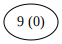

insert 7 in the tree


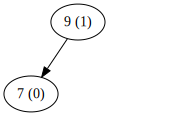

insert 53 in the tree


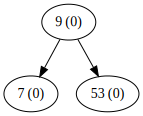

insert 42 in the tree


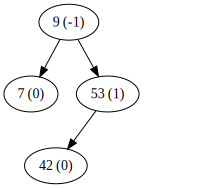

insert 6 in the tree


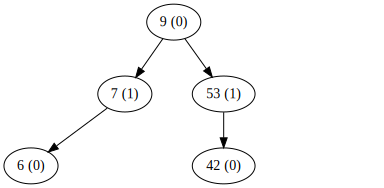

insert 14 in the tree


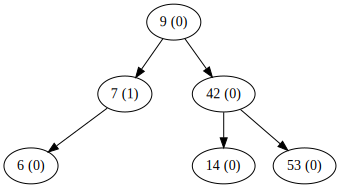

insert 68 in the tree


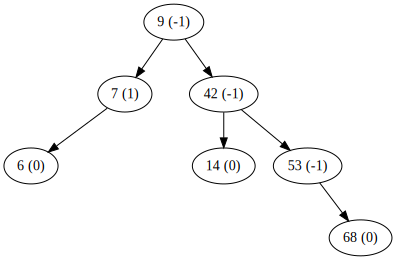

In [64]:
t = None
from random import sample
for i in sample(range(1, 100), k=7):
    print("insert", i, "in the tree")
    t, _ = AVL_insert(i, t)
    IPython.display.display(tree_to_dot_AVL(t))